In [4]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import bz2
import codecs
import xml
import glob
import os
import bs4
import collections
import itertools
import math
import networkx as nx
import community
import pickle
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from pattern.nl import parsetree, pprint, singularize, pluralize
from pattern.metrics import readability
from xml import parsers
import xml.parsers.expat
from xml.etree import cElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt
from IPython.display import display, HTML 

In [5]:
def parse_troonrede(f):
    '''Read a troonrede file, extract all text and output a list of lists, 
    each element is a paragraph containing a list of sentences,
    each sentence is parsed.'''
    soup= BeautifulSoup(open(f).read())
    ourdiv=soup.find('div', id="post-content") 
    ourpars= [parsetree(p.text, lemmata=True, Relations=True) for p in ourdiv.findAll('p')[1:-1]]
    return ourpars

# this applies step 2 to all troonredes 
def parse_corpus(folder):
    alltroonredes= glob.glob(os.path.join(folder, '*.html'))
    troonredes={}
    for troonrede in alltroonredes:
        key= troonrede.split('\\')[1].replace('.html','')
        value= parse_troonrede(troonrede)
        troonredes[key]=value
    return troonredes

parsedtroonredes= parse_corpus('files')
print "Troonrede parsing"

Troonrede parsing


C:\Users\lol_l\Anaconda2\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
'''Gehele corpus met lemmatiseren'''
def processText(parsedcorpus):
    wordsPerPara= [list([ w.lemma for s in p for w in s.nouns])  for p in parsedcorpus  ]
    return wordsPerPara

tekst= {k:processText(parsedtroonredes[k]) for k in parsedtroonredes}

In [7]:
'''Gehele corpus zonder te lemmatiseren'''
def getData(parsedcorpus):
    wordsPerPara= [list([ w for s in p for w in s.nouns])  for p in parsedcorpus  ]
    return wordsPerPara

data = {k:getData(parsedtroonredes[k]) for k in parsedtroonredes}

In [8]:
'''Functie om het aantal lettergrepen te bepalen van een woord'''
def syllablesCount(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if count == 0:
        count +=1
    return count

In [9]:
'''Per jaar de hoeveelheid paragrafen, zinnen en woorden'''
redes = {}
dataPerYear = {}
for troonrede in parsedtroonredes:
    year = troonrede
    paragraphs = 0
    sentences = 0
    words = 0
    syllables = 0
    rede = []
    for paragraph in parsedtroonredes[troonrede]:
        paragraphs += 1
        sentences += len(paragraph)
        for sentence in paragraph:
            words += len(sentence)
            for word in sentence:
                if word.string == "." or word.string == ",":
                    rede.append(word.string)
                else:
                    rede.append(word.string)
                    try:
                        syllables += syllablesCount(word.string)
                    except:
                        pass
    redes[year] = rede            
    info = [paragraphs,sentences,words,syllables]
    dataPerYear[year] = info
print "- dataPerYear bevat per jaar: aantal paragrafen, aantal zinnen, aantal woorden en aantal lettergrepen in de gehele troonrede"
print "- redes bevat per jaar de gehele troonrede als tekst"

- dataPerYear bevat per jaar: aantal paragrafen, aantal zinnen, aantal woorden en aantal lettergrepen in de gehele troonrede
- redes bevat per jaar de gehele troonrede als tekst


In [10]:
'''Dataframe van gegevens voor de troonredes per jaar'''
df = pd.DataFrame(dataPerYear)
yearFrame = df.transpose()
yearFrame.columns = ['Paragrafen', 'Zinnen', 'Woorden', 'Lettergrepen']
yearFrame

,Paragrafen,Zinnen,Woorden,Lettergrepen
1818,16,42,1203,1999
1820,39,51,1792,2944
1821,12,30,993,1605
1822,17,37,1064,1744
1823,16,42,1077,1783
1824,25,45,1258,2088
1825,22,38,1263,2094
1826,22,36,1472,2510
1827,23,39,1205,2034
1828,26,37,1605,2727


In [19]:
pickle.dump( yearFrame, open( "yearFrame.p", "wb" ) )

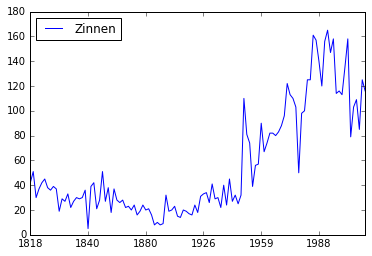

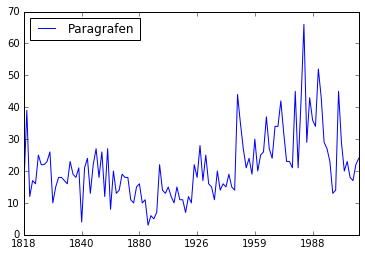

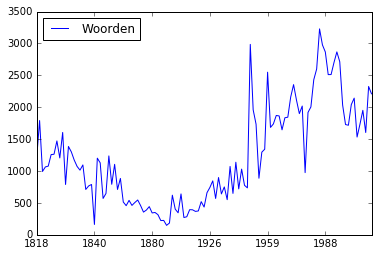

In [18]:
'''Plotten van de graphs met jaarinformatie (deze kunnen mogelijk in de scriptie worden weergegeven)'''
yearFrame.plot(x=yearFrame.index.values, y='Zinnen')
yearFrame.plot(x=yearFrame.index.values, y='Paragrafen')
yearFrame.plot(x=yearFrame.index.values,y='Woorden')

In [8]:
'''Berekenen van de gemiddelde zinslengte'''
gemZinslengte = yearFrame["Woorden"].sum()/yearFrame["Zinnen"].sum()
print gemZinslengte

21


In [9]:
print info
paragraphCount = 0
for year in dataPerYear:
    paragraphCount += dataPerYear[year][0]
print paragraphCount

[20, 79, 1533, 2807]
2491


In [10]:
'''Data zonder lemmatiseren'''
dataDict = {}
for troonrede in sorted(data):
    for paragraph in data[troonrede]:
        for words in paragraph:
            word = words.string.lower()
            if word in dataDict:
                dataDict[word] += 1
            else:
                dataDict[word] = 1                

In [11]:
'''Data met lemmatiseren'''
lemmaDict = {}
for troonrede in sorted(tekst):
    for paragraph in tekst[troonrede]:
        for word in paragraph:
            try:
                if str(word) in lemmaDict:
                    lemmaDict[str(word)] += 1
                else:
                    lemmaDict[str(word)] = 1
            except:
                pass

In [12]:
extra = []
for year in sorted(dataPerYear):
    extra.append(year)
print extra

['1818', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1882', '1883', '1884', '1885', '1886', '1887', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1904', '1923', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1946', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1976', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [12]:
'''Lijst van alle jaartallen waar troonredes van zijn'''
yearList = []
for year in sorted(dataPerYear):
    yearList.append(year)
yearList.append("IDF")

In [13]:
'''De tekst van elke troonrede gelematiseerd (niet meer verdeeld onder paragrafen)'''
lemmaRedes = {}
for year in sorted(tekst):
    yearWords = []
    for lists in tekst[year]:
        for word in lists:
            yearWords.append(word)
    lemmaRedes[year] = yearWords

In [14]:
'''Per woord hoevaak het voorkomt in een jaar'''
wordDataDict = {}
for word in lemmaDict:
    wordDataDict[word] = []
    for rede in sorted(lemmaRedes):
        count = lemmaRedes[rede].count(word)
        wordDataDict[word].append(count)          

In [15]:
'''Berekenen van de IDF met logaritme basis 10'''
if len(wordDataDict["aandacht"]) < 118:
    Ndocs = float(len(yearList)-1)
    for word in wordDataDict:
        Nmatching = Ndocs - wordDataDict[word].count(0)
        IDF = math.log((Ndocs/Nmatching),10)
        wordDataDict[word].append(IDF)

In [16]:
'''Dataframe van alle gelematiseerde woorden die zijn gebruikt in de troonredes en hoevaak ze in een jaar voorkomen
hapaxen zijn hier weggelaten en ook woorden die slechts 2 of 3 keer voorkomen'''
df = pd.DataFrame(wordDataDict)
wordFrame = df.transpose()
wordFrame.columns = yearList
wordFrame['SUM'] = wordFrame[yearList[:-1]].sum(axis=1)
'''Aantal hapaxen wordt ook berekend en daarna verwijdert'''
hapaxen = len(list(wordFrame.loc[wordFrame.SUM == 1]))
wordFrame = wordFrame.loc[wordFrame.SUM != 1]
wordFrame = wordFrame.loc[wordFrame.SUM != 2]
wordFrame = wordFrame.loc[wordFrame.SUM != 3]
wordFrame

,1818,1820,1821,1822,1823,1824,1825,1826,1827,1828,...,2007,2008,2009,2010,2011,2012,2013,2014,IDF,SUM
,5,3,2,1,1,0,2,2,2,1,...,2,0,0,0,0,0,1,4,0.216928,128
aanbod,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.223088,7
aanbouw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.466126,4
aandacht,1,0,1,0,1,3,2,2,0,1,...,3,3,2,0,0,0,3,1,0.193125,179
aandeel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.113943,12
aangelegenheid,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1.026793,12
aanleg,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0.922058,14
aanleiding,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0.745967,25
aanmerking,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0.837737,18
aanmoediging,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.369216,5


In [18]:
'''Gebruikt de dictionary van gelemmatiseerde woorden om een dictionary te maken van alle mogelijke combinaties van 2 woorden'''
wordlist = []
fullCombiDict = {}
for word in lemmaDict:
    word = re.sub(r'[^\w]', '', word)
    if len(word) > 2:
        wordlist.append(word)
for combi in itertools.combinations(sorted(wordlist),2):
    fullCombiDict[combi] = 0

In [23]:
'''Bouwen van de collocatie dataframe voor alle troonredes'''
yearCombiDict = {}
for troonrede in tekst:
    combiDict = {}
    for paragraph in tekst[troonrede]:
        words = []
        for word in paragraph:
            word = re.sub(r'[^\w]', '', word)
            if len(word) > 2:
                words.append(word)
        for combi in itertools.combinations(sorted(words),2):
            if combi in fullCombiDict:
                fullCombiDict[combi] += 1
            else:
                pass
            if combi in combiDict:
                combiDict[combi] += 1
            else:
                combiDict[combi] = 1
    yearCombiDict[troonrede] = combiDict

In [24]:
'''Collocaties over het gehele corpus'''
totalCollocations = pd.Series(fullCombiDict).unstack().fillna(0)

In [109]:
# Opslaan van het netwerk dictionary naar pickle
pickle.dump( netwerkDict, open( "netwerk.p", "wb" ) )

In [ ]:
# binnenhalen van de opgeslagen dictionary
netwerkDict = pickle.load( open( "netwerk.p", "rb" ) )

In [27]:
'''Collocaties over het gehele corpus met enkele restricties:
een woord moet minstens deel uitmaken van 21 collocaties, dit omdat de gemiddelde zinslengte 21 woorden is'''
dropped = totalCollocations.loc[totalCollocations.sum(axis=1) < 22].index.values
totalCollocations.drop(dropped,axis=1,inplace=True)
totalCollocations.drop(dropped,axis=0,inplace=True)
'''Verwijderen van mogelijke woorden die niet op beide assen staan'''
index = list(totalCollocations.index.values)
columns = list(totalCollocations.columns.values)
column = list(set(columns)-set(index))[0]
row = list(set(index)-set(columns))[0]
totalCollocations.drop(column,axis=1,inplace=True)
totalCollocations.drop(row,axis=0,inplace=True)

In [28]:
totalCollocations

,22jarige,9oooo,aambeeld,aan,aanbeveel,aanbeveling,aanbod,aanbouw,aandacht,aandeel,...,wijze,wijziging,woning,woningbouw,zaak,zeeg,ziekenhuis,zitting,zoo,zorg
22jarige,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9oooo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
aambeeld,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aan,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbod,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
aanbouw,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,1
aandacht,0,0,0,0,0,0,0,0,0,0,...,2,11,4,2,5,1,0,7,13,20
aandeel,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2,0,0,0,0,0,3


In [29]:
#values = totalCollocations.loc[totalCollocations.values > 20]
index = 0
for word in totalCollocations.values.tolist():
    column = 0
    for col in word:
        if col > 20:
            print index, column, col
        column += 1
    index += 1

8 734 29.0
8 1366 49.0
8 1496 52.0
8 1602 25.0
8 1640 30.0
8 1657 21.0
8 1738 21.0
8 1819 49.0
8 1856 43.0
8 2085 112.0
8 2314 22.0
8 2320 29.0
27 2085 24.0
38 2085 25.0
43 1366 49.0
43 1496 33.0
43 1640 32.0
43 1819 29.0
43 1856 22.0
43 2085 62.0
51 734 25.0
66 468 27.0
66 734 41.0
66 1702 27.0
90 2085 21.0
94 2046 25.0
94 2085 34.0
118 2085 34.0
140 734 44.0
140 2269 24.0
165 1453 34.0
165 1496 26.0
165 1738 23.0
165 2085 34.0
165 2229 24.0
173 734 32.0
173 2085 28.0
236 1640 26.0
251 2085 23.0
274 600 27.0
274 826 23.0
274 1366 33.0
274 1496 28.0
274 1640 26.0
274 1947 38.0
274 2085 57.0
274 2429 25.0
278 1366 27.0
278 1947 29.0
278 2085 48.0
296 1366 21.0
301 1366 37.0
301 2085 41.0
313 2085 22.0
326 2085 27.0
334 734 62.0
334 1366 53.0
334 1496 62.0
334 1602 23.0
334 1738 39.0
334 1819 25.0
334 1856 35.0
334 1947 24.0
334 2085 90.0
334 2134 25.0
334 2302 21.0
334 2380 26.0
334 2436 26.0
334 2449 27.0
337 1366 27.0
337 2085 36.0
354 600 21.0
354 826 22.0
354 1366 73.0
354 1496 63.0

In [30]:
'''Dataframe waar verschillende limitaties op worden uitgetest'''
trimmedLocations = totalCollocations
trimmedLocations

,22jarige,9oooo,aambeeld,aan,aanbeveel,aanbeveling,aanbod,aanbouw,aandacht,aandeel,...,wijze,wijziging,woning,woningbouw,zaak,zeeg,ziekenhuis,zitting,zoo,zorg
22jarige,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9oooo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
aambeeld,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aan,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbod,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
aanbouw,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,1
aandacht,0,0,0,0,0,0,0,0,0,0,...,2,11,4,2,5,1,0,7,13,20
aandeel,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2,0,0,0,0,0,3


In [31]:
'''Limiteren van collocaties'''
dropped = trimmedLocations.loc[trimmedLocations.sum(axis=1) < 200].index.values
trimmedLocations.drop(dropped,axis=1,inplace=True)
trimmedLocations.drop(dropped,axis=0,inplace=True)
trimmedLocations

,aandacht,aandeel,aangelegenheid,aanleg,aanleiding,aanmerking,aanpak,aanpassing,aansluiting,aantal,...,tijd,toekomst,toestand,uitgaf,unie,uwe,veiligheid,verantwoordelijkheid,verband,verbetering
aandacht,0,0,1,1,2,1,3,2,5,9,...,17,9,10,4,8,8,22,14,13,29
aandeel,0,0,0,0,0,0,0,1,0,0,...,0,0,2,4,1,0,2,5,1,0
aangelegenheid,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,4,0,0,2,1
aanleg,0,0,0,0,0,0,0,0,0,0,...,1,0,3,1,0,3,0,1,0,4
aanleiding,0,0,0,0,0,0,1,0,0,4,...,5,0,2,0,0,0,0,2,1,2
aanmerking,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,2,3,1,0,1,1
aanpak,0,0,0,0,0,0,0,0,0,5,...,3,2,0,1,0,0,2,2,1,2
aanpassing,0,0,0,0,0,0,0,0,1,2,...,4,0,2,1,1,0,3,4,0,1
aansluiting,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,3,0,1,1,0,0
aantal,0,0,0,0,0,0,0,0,0,0,...,7,6,1,8,11,0,2,0,2,9


In [47]:
print trimmedLocations.reset_index().to_latex(index=False)

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
                index &  aandacht &  aandeel &  aangelegenheid &  aanleg &  aanleiding &  aanmerking &  aanpak &  aanpassing &  aansluiting &  aantal &  aanvang &  aanzien &  aard &  achterstand &  activiteit &  advies &  afgeloop &  afghanistan &  afhankelijkheid &  afloop &  afrika &  afspraak &  akkoord &  algemeen &  algemene &  antillen &  arbeid &  arbeidskost &  arbeidsparticipatie &  armoede &  atlantisch &  baan &  band &  banen &  basis &  bedraag &  bedrag &  bedrijf &  bedrijfsleven &  bedrijfstak &  bedrijvigheid &  begeleiding &  begin &  beginsel &  begrip &  begrooting &  begroting &  behandeling &  beheer &  beheersi

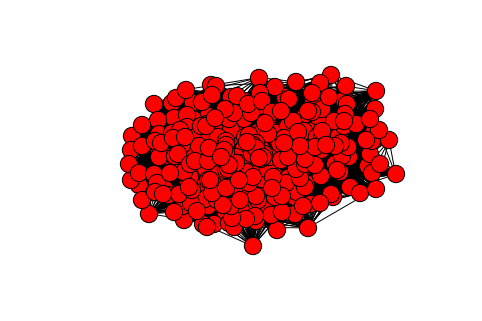

In [32]:
'''Creëeren van een undirected networkx graph vanuit de matrix van alle collocaties'''
graph = nx.from_numpy_matrix(trimmedLocations.values)
drawing = nx.draw(graph)
plt.figure(figsize=(80,50))
plt.show()

In [53]:
# Vergroten van de graphs zodat ze duidelijker zijn
%pylab inline
pylab.rcParams['figure.figsize'] = 16, 12

Populating the interactive namespace from numpy and matplotlib


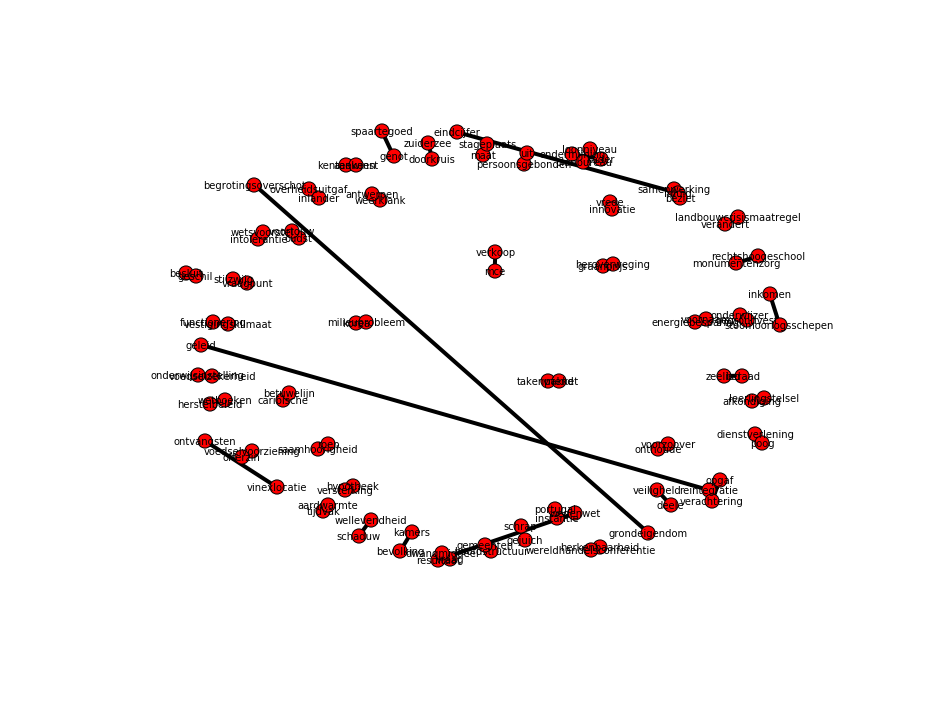

In [110]:
# Creeëren van de weighted graph vanuit de gevonden similarity scores
G = nx.Graph()
for item in netwerkDict:
    G.add_edge(item[0],item[1],weight=netwerkDict[item])
    
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=200)

# edges
nx.draw_networkx_edges(G,pos, width=4)

# labels
nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.figure(figsize=(1000,1000))
plt.show() # display

In [37]:
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

AttributeError: 'module' object has no attribute 'best_partition'

In [ ]:
nx.draw(graph)
plt.figure(figsize=(700,600))
plt.show()

In [ ]:
'''Bepalen van AVI niveau per jaar, hoe lager de score, hoe moeilijker de tekst'''
for year in sorted(dataPerYear):
    gemZinslengte = dataPerYear[year][2]/dataPerYear[year][1]
    gemWoordlengte = dataPerYear[year][3]/dataPerYear[year][2]
    leesindex = 195 - (2*gemZinslengte) - (200/3)*gemWoordlengte
    print year, leesindex

In [ ]:
'''Tekst leesbaarheidsniveau per jaar aan de hand van de "Flesch–Kincaid readability test"'''
for rede in sorted(redes):
    print rede, (readability(redes[rede])*100)